In [32]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [33]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
maze.render()

This is how maze looks like

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ A □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [34]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(perception) and
                cl.action == action and
                cl.fitness > 0.05 and cl.experience > 10
               ]):
            nr_correct += 1
    return nr_correct / len(transitions)

def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity,
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=8,
                    max_population=200,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [1.2994767312751368e-40, 8.425094683250161e-41, 8.080616036546928e-41, 2.151275922133162e-40, 2.9886157503025325e-41, 1.4932361310615476e-40, 2.3431117194781775e-40, 2.503236778141304e-40], 'numerosity': 93, 'knowledge': 0.0, 'population': 86}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 50, 'reward': [17.7106160096439, 18.70375874734619, 27.413616771523962, 14.32479539360515, 16.020762763464212, 19.49788993491228, 22.215559261798692, 15.964796992604844], 'numerosity': 201, 'knowledge': 0.043478260869565216, 'population': 169}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 50, 'reward': [21.714908624246938, 26.038510393095187, 22.234101477763122, 25.491632641949376, 26.812847858516776, 23.08848403102084, 26.36926308323193, 27.6454171312055], 'numerosity': 200, 'knowledge': 0.10434782608695652, 'population': 172}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': [41.78482065075315, 48

Cond:0#00#101 - Act:5 - Num:1 [fit: 0.024, exp: 15.00, pred: 169.453]
Cond:00100010 - Act:5 - Num:1 [fit: 0.246, exp: 27.00, pred: 149.659]
Cond:#111000# - Act:4 - Num:1 [fit: 0.172, exp: 4.00, pred: 150.193]
Cond:01000000 - Act:5 - Num:1 [fit: 0.051, exp: 60.00, pred: 197.923]
Cond:11001011 - Act:5 - Num:1 [fit: 0.098, exp: 16.00, pred: 167.031]
Cond:01011101 - Act:5 - Num:1 [fit: 0.050, exp: 1.00, pred: 155.909]
Cond:01110##0 - Act:7 - Num:1 [fit: 0.372, exp: 10.00, pred: 177.754]
Cond:00100001 - Act:6 - Num:2 [fit: 0.244, exp: 5.00, pred: 168.252]
Cond:11100101 - Act:4 - Num:1 [fit: 0.033, exp: 12.00, pred: 204.163]
Cond:011##100 - Act:2 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000]
Cond:10000010 - Act:6 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000]
Cond:#0##0010 - Act:5 - Num:1 [fit: 0.448, exp: 33.00, pred: 176.638]
Cond:9111#000 - Act:0 - Num:1 [fit: 0.022, exp: 9.00, pred: 146.504]
Cond:00001000 - Act:5 - Num:1 [fit: 0.035, exp: 16.00, pred: 207.995]
Cond:#11101#0 - Act:1 - Num:1 

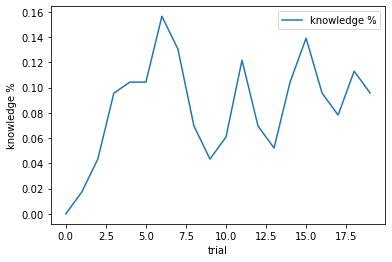

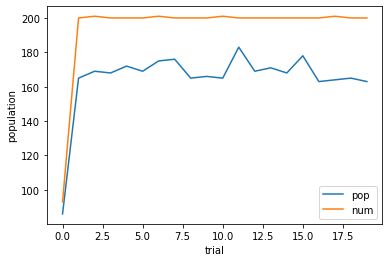

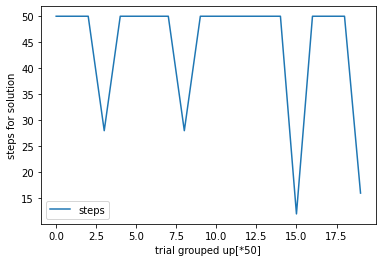

In [35]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []



xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [36]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
